# **Title of Project : Wine Quality Prediction using SVM**

**Data Set Information:**

This data frame contains the following columns:

Input variables (based on physicochemical tests):\
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
Output variable (based on sensory data):\
12 - quality (score between 0 and 10)

This dataset is also available from Kaggle & UCI machine learning repository, 

https://archive.ics.uci.edu/ml/datasets/wine+quality.

## **Import Library**

In [89]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import plotly.graph_objects as go
import missingno as msno

from sklearn import preprocessing
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score, classification_report,precision_score,recall_score
from scipy import stats
from imblearn.over_sampling import SMOTE 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

## **Import Data**

In [81]:
train = pd.read_csv('/content/WineQT.csv')

In [82]:
train

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
0         9.4        5     0  
1         9.8        5     1  
2         9.8        5     2  
3         9.8        6     3  
4         9.4        5     4  
...       ...      ...   ...  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597  

[1143 rows x 13 columns]

In [83]:
train=train.set_index('Id')

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 116.1 KB


What features are in the dataset?

>**fixed acidity**. Fixed acidity is due to the presence of non-volatile acids in wine. For example, tartaric, citric or malic acid. This type of acid combines the balance of the taste of wine, brings freshness to the taste.

>**Volatile acidity** is the part of the acid in wine that can be picked up by the nose. Unlike those acids that are palpable to the taste (as we talked about above). Volatile acidity, or in other words, souring of wine, is one of the most common defects.

>**citric acid** - allowed to offer in winemaking by the Resolution of the OIV No. 23/2000. It can be used in three cases: for acid treatment of wine (increasing acidity), for collecting wine, for cleaning filters from possible fungal and mold infections.

>**residual sugar** is that grape sugar that has not been fermented in alcohol

>**chlorides.** The structure of the wine also depends on the content of minerals in the wine, which determine the taste sensation such as salinity (sapidità). Anions of inorganic acids (chlorides, sulfates, sulfites..), anions of transferred acids, metal cations (potassium, sodium, magnesium...) are found in wine. Their content depends mainly on the climatic zone (cold or warm region, salty soils depending on the observation of the sea), oenological practices, storage and aging of wine.

>**free sulfur dioxide**, total sulfur dioxide - Sulfur dioxide (sulfur oxide, sulfur dioxide, readiness E220, SO2) is used as a preservative due to its antioxidant and antimicrobial properties. Molecular SO2 is an extremely important antibiotic, affecting significant consumption (including wild yeast) that can manifest itself in wine spoilage.

>**Density** - The density of wine can be either less or more than water. Its value is determined primarily by the concentration of alcohol and sugar. White, rosé and red wines are generally light - their density at 20°C is below 998.3 kg/m3.

>**pH** is a measure of the acidity of wine. All wines ideally have a pH level between 2.9 and 4.2. The lower the pH, the more acidic the wine; the lower the pH, the less acidic the wine.

>**Sulfates** are a natural result of yeast fermenting the sugar in wine into alcohol. That is, the presence of sulfites in wine is excluded.

>**alcohol** - The alcohol content in wines depends on many tastes: the grape variety and the amount of sugar in the berries, production technology and growing conditions. Wines vary greatly in degree: this Parameter varies from 4.5 to 22 depending on the category.

>**quality** is a target.

In [85]:
train.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043  
std       0.156664     0.170399     1.082196     0.805824  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.205000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

## **Data Visualization**


In [86]:
columns=train.columns

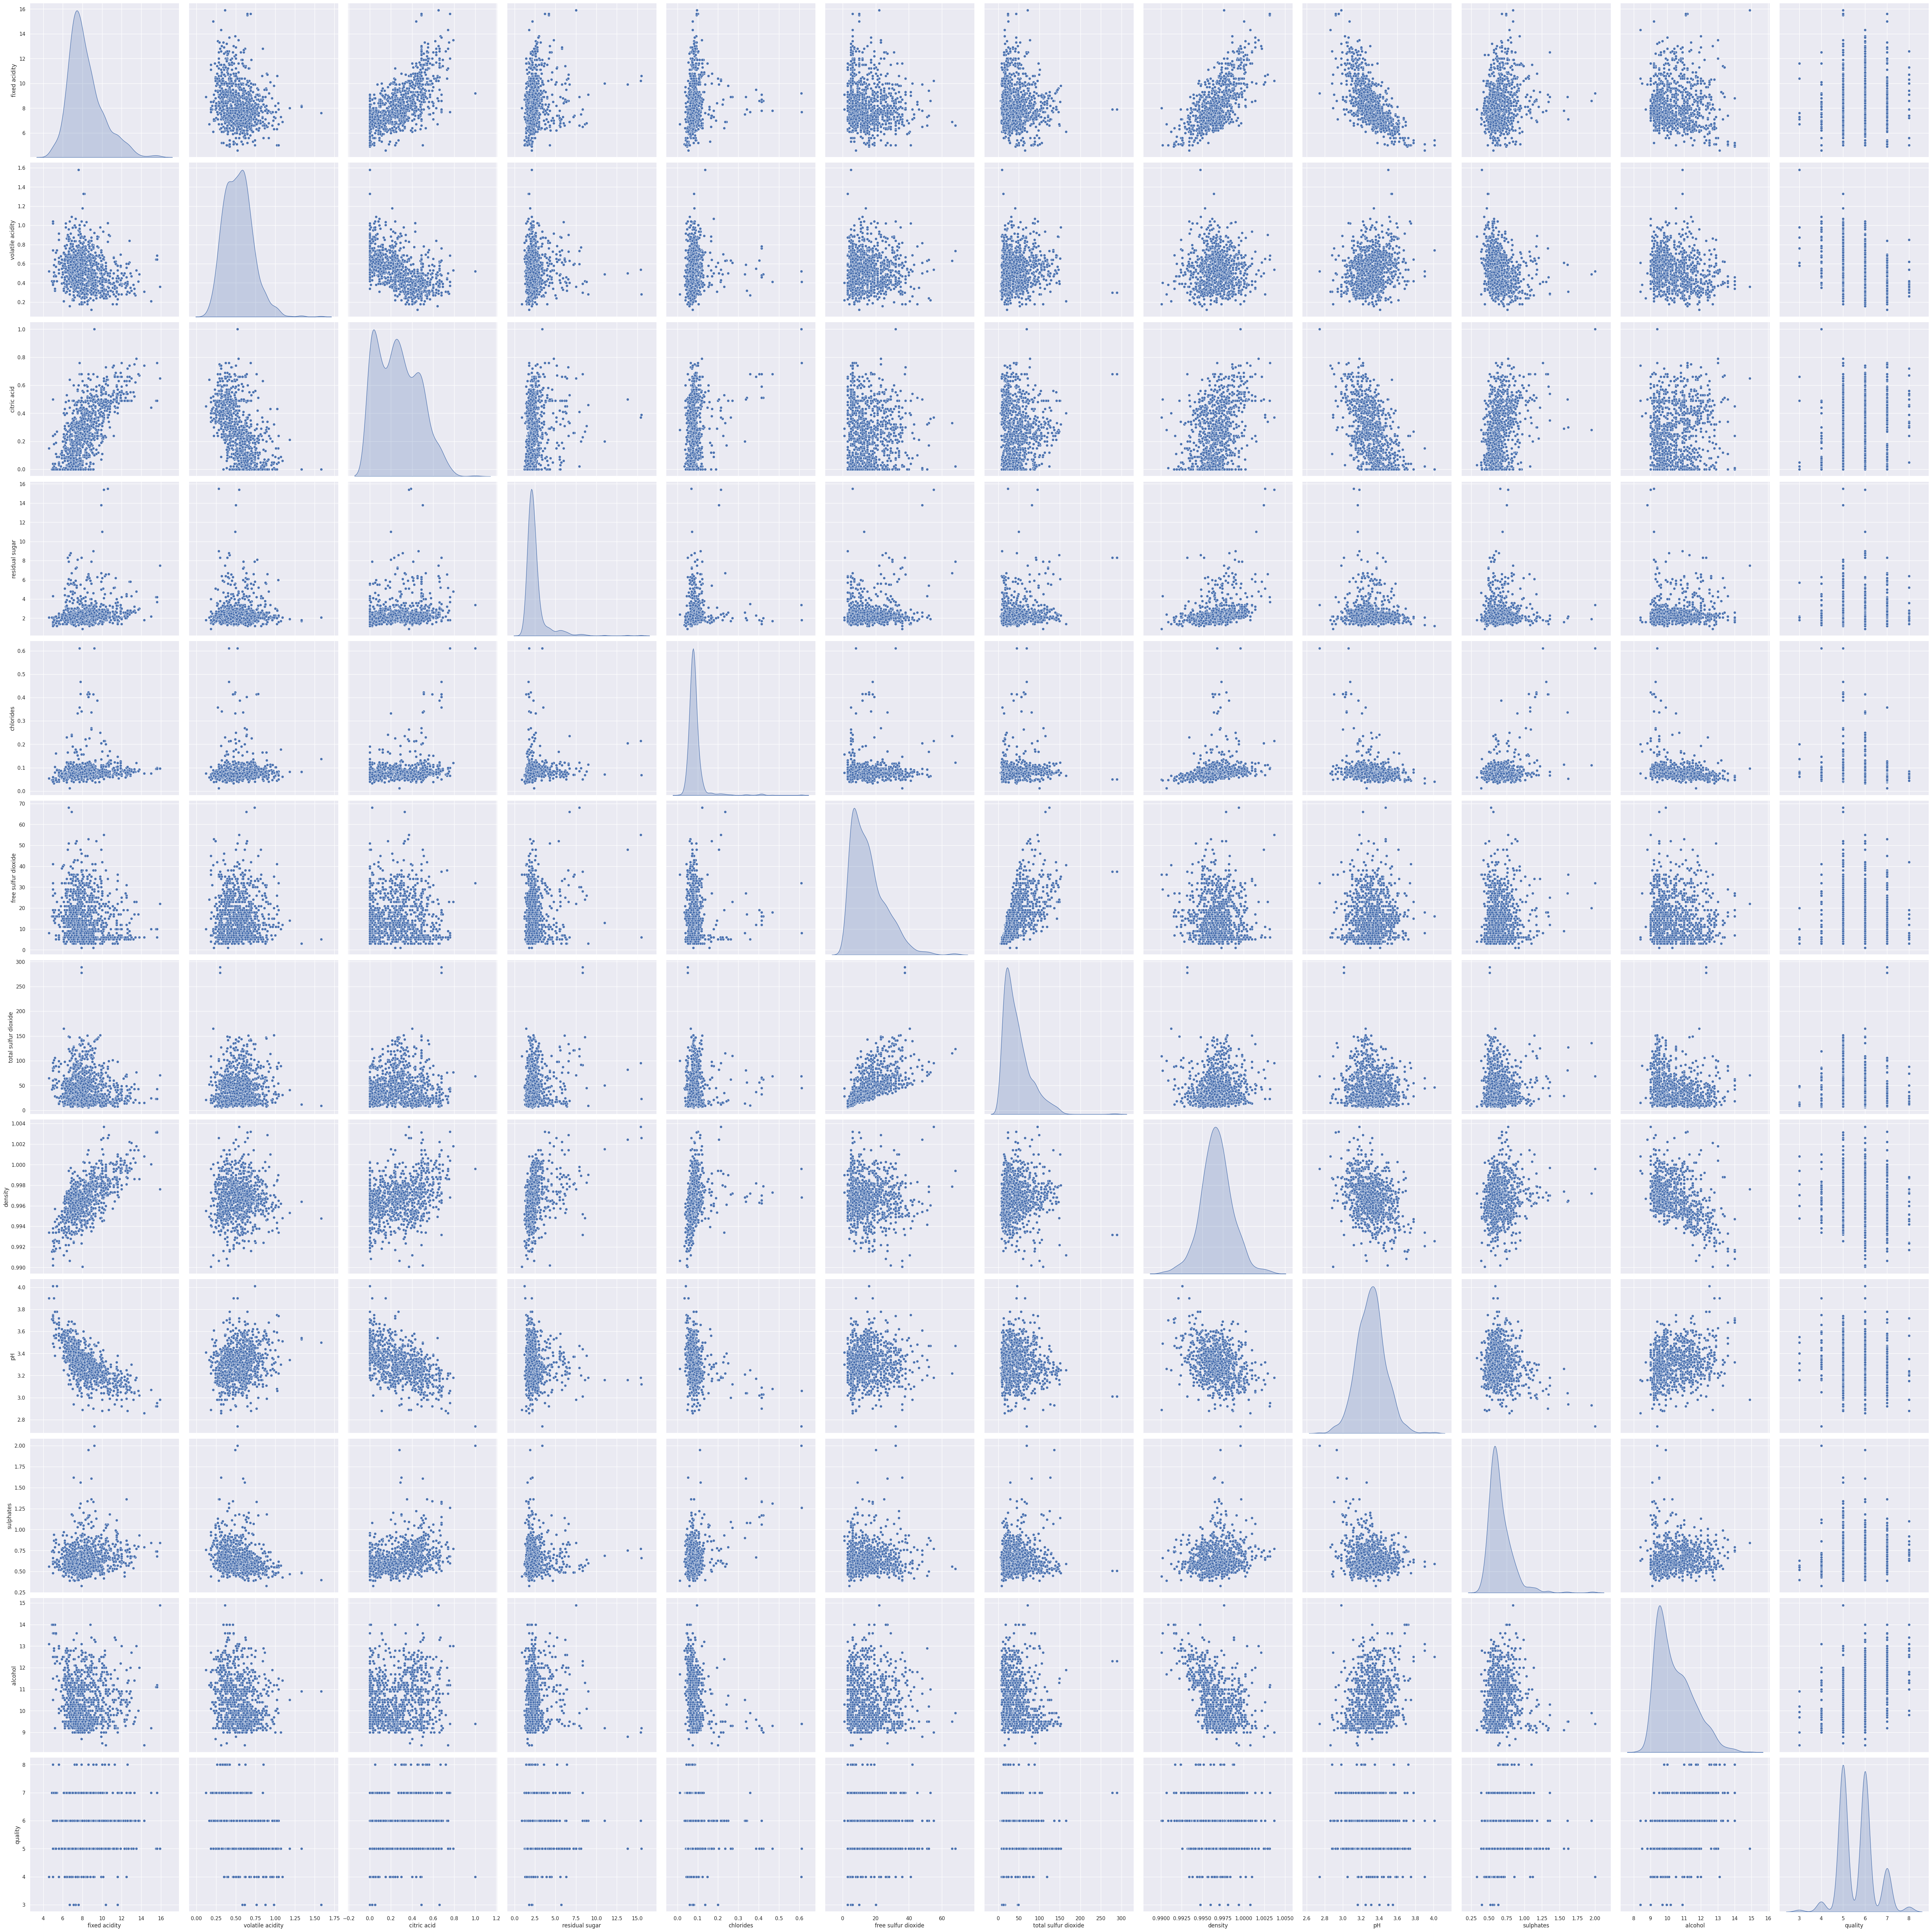

In [87]:
sns.set()
sns.pairplot(train[columns],height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

In [88]:
fig = go.Figure(data=[go.Pie(labels=train['quality'].value_counts().index, values=train['quality'].value_counts(), hole=.3)])
fig.update_layout(legend_title_text='Quality')
fig.show()

## **Data Preprocessing**




In [90]:
oversample = SMOTE()
features, labels=  oversample.fit_resample(train.drop(["quality"],axis=1),train["quality"])

In [91]:
scaler = preprocessing.MinMaxScaler()
names = features.columns
d = scaler.fit_transform(features)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.149254              0.098940  0.567548  0.606299   0.137725   
1             0.358209              0.215548  0.494126  0.362205   0.209581   
2             0.208955              0.169611  0.508811  0.409449   0.191617   
3             0.238806              0.190813  0.582232  0.330709   0.149701   
4             0.149254              0.098940  0.567548  0.606299   0.137725   

    alcohol  
0  0.153846  
1  0.215385  
2  0.215385  
3  0.215385  
4  0.153846

## **Train Test Split**

In [92]:
X_train, X_test, y_train, y_test=train_test_split(scaled_df,labels,test_size=0.33,random_state=42)

In [93]:
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1941, 11), (957, 11), (1941,), (957,))

## **Modeling**

In [94]:
model = SVC()

In [95]:
# Step 9 : train or fit model
model.fit(X_train,y_train)

SVC()

In [96]:
y_pred = model.predict(X_test)

In [98]:
print(f'model: {str(model)}')
print(classification_report(y_test,y_pred, zero_division=1))
print('-'*30, '\n')

model: SVC()
              precision    recall  f1-score   support

           3       0.87      1.00      0.93       156
           4       0.73      0.75      0.74       157
           5       0.61      0.61      0.61       168
           6       0.57      0.38      0.45       166
           7       0.71      0.72      0.71       159
           8       0.80      0.93      0.86       151

    accuracy                           0.73       957
   macro avg       0.71      0.73      0.72       957
weighted avg       0.71      0.73      0.71       957

------------------------------ 



## **Explanation**



> The results show that the model performs well for some classes (such as class 3 and class 8), achieving high precision and recall scores, indicating that the model is able to accurately classify instances of those classes. However, for other classes (such as class 5 and class 6), the model performs less well, achieving lower precision and recall scores, indicating that the model struggles to accurately classify instances of those classes.

>The overall **accuracy** of the model is reported as 0.73, which means that the model correctly classifies 73% of the instances in the dataset. The** macro-average F1-score** is reported as 0.72, which is the average F1-score across all classes, weighted equally. The** weighted-average F1-score** is also reported as 0.71, which is the weighted average of the F1-scores across all classes, weighted by the number of instances in each class.


